In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

/Users/admin/.pyenv/versions/anaconda3-2.4.0/envs/tensorFlow/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
np.random.seed(20160512)

n0, mu0, variance0 = 20, [10, 11], 20
data0 = multivariate_normal(mu0, np.eye(2)*variance0, n0)
df0 = DataFrame(data0, columns=['x1','x2'])
df0['t'] = 0

n1, mu1, variance1 = 15, [18,20], 22
data1 = multivariate_normal(mu1, np.eye(2)*variance1, n1)
df1 = DataFrame(data1, columns=['x1','x2'])
df1['t' ] = 1

df = pd.concat([df0, df1], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

In [3]:
train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

In [4]:
x = tf.placeholder(tf.float32, [None, 2])
w = tf.Variable(tf.zeros([2, 1]))
w0 = tf.Variable(tf.zeros([1]))
f = tf.matmul(x,w) + w0
p = tf.sigmoid(f)

In [5]:
t = tf.placeholder(tf.float32, [None,1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.AdamOptimizer().minimize(loss)

In [6]:
correct_prediction = tf.equal(tf.sign(p-0.5), tf.sign(t-0.5))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [8]:
i = 0
for _ in range(20000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 2000 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:train_x, t:train_t})
        print('step: %d, loss: %f, accuracy: %f' % (i, loss_val, acc_val))

step: 2000, loss: 15.165894, accuracy: 0.885714
step: 4000, loss: 10.772635, accuracy: 0.914286
step: 6000, loss: 8.197757, accuracy: 0.971429
step: 8000, loss: 6.576121, accuracy: 0.971429
step: 10000, loss: 5.511984, accuracy: 0.942857
step: 12000, loss: 4.798029, accuracy: 0.942857
step: 14000, loss: 4.314191, accuracy: 0.942857
step: 16000, loss: 3.986273, accuracy: 0.942857
step: 18000, loss: 3.766507, accuracy: 0.942857
step: 20000, loss: 3.623062, accuracy: 0.942857


In [9]:
w0_val, w_val = sess.run([w0,w])
w0_val, w1_val, w2_val = w0_val[0], w_val[0][0], w_val[1][0]
print(w0_val, w1_val, w2_val)

-15.6304 0.560301 0.492597


In [10]:
train_set0 = train_set[train_set['t'] == 0]
train_set1 = train_set[train_set['t'] == 1]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(0,30)
subplot.set_xlim(0,30)


(0, 30)

In [11]:
train_set1.x1, train_set.x2
subplot.scatter(train_set1.x1,train_set1.x2, marker='x')
subplot.scatter(train_set0.x1,train_set0.x2, marker='o')

linex = np.linspace(0,30,10)
liney = - (w1_val * linex/w2_val + w0_val/w2_val)
subplot.plot(linex, liney)

field = [[1 / (1 + np.exp(-(w0_val + w1_val * x1 + w2_val * x2)))
         for x1 in np.linspace(0,30,100)]
        for x2 in np.linspace(0,30,100)]
subplot.imshow(field, origin='lower', extent=(0,30,0,30),cmap=plt.cm.gray_r, alpha=0.5)

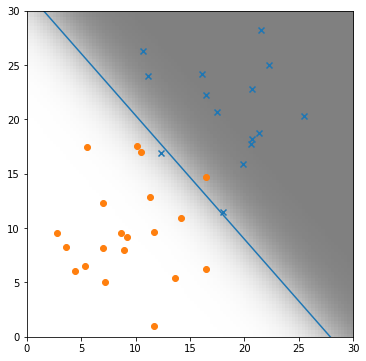

In [12]:
fig